In [1]:
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

In [3]:
def show_book(figname):
    print(r"Siehe Abbildung §\ref{fig_XXX}§".replace("XXX", figname))
    plt.savefig(f"{figname}_snip.pdf")
    plt.show()

Siehe Abbildung §\ref{fig_introduction}§


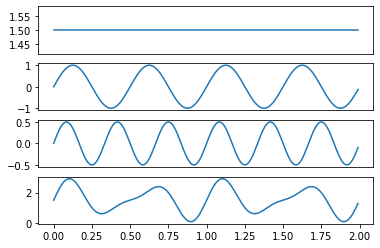

In [58]:
ts = np.arange(0, 2, 1e-2)  # interessant ist, wenn das intervall so ist, dass das signal nicht periodisch wird
y1 = np.ones(len(ts)) * 1.5
y2 = np.sin(2*pi*ts*2)
y3 = 0.5*np.sin(2*pi*ts*3)

plt.subplot(411)
plt.plot(ts, y1)
plt.xticks([])
plt.subplot(412)
plt.plot(ts, y2)
plt.xticks([])
plt.subplot(413)
plt.plot(ts, y3)
plt.xticks([])
plt.subplot(414)
plt.plot(ts, y1+y2+y3)

show_book('introduction')

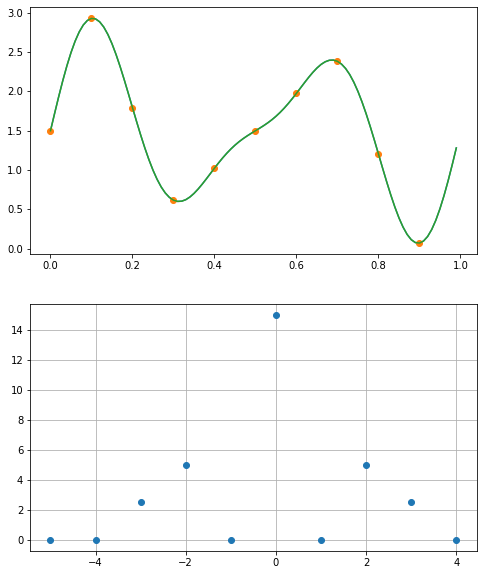

In [5]:
ts = np.arange(0, 1, 1e-2)  # interessant ist, wenn das intervall so ist, dass das signal nicht periodisch wird
ys = np.sin(2*pi*ts*2) + 0.5*np.sin(2*pi*ts*3) + 1.5  # f1 = 2 Hz, f2 = 3 Hz

fs = 10
tk = ts[::10]   # sampling frequency 10 Hz
yk = ys[::10]
n = len(tk)

Yk = np.fft.fft(yk)
Fk = np.fft.fftfreq(n, 1/fs)

abc = np.real(sum(Y*np.exp(2*pi*F*ts*1j)/n for F, Y in zip(Fk, Yk)))


plt.figure(figsize=(8, 10))
plt.subplot(211)
plt.plot(ts, ys)
plt.plot(tk, yk, 'o')
plt.plot(ts, abc)

plt.subplot(212)
plt.plot(Fk, np.abs(Yk), 'o')
plt.xticks(Fk[::2])
plt.grid()
plt.show()

In [6]:
import sympy as sp

In [7]:
t = sp.symbols('t')
y = sp.sin(2*sp.pi*t*2) + 0.5*sp.sin(2*sp.pi*t*3) + 1.5
T = 1

series_coeffs = [(k, 1/T * sp.integrate(y * sp.exp(-2*sp.pi*sp.I*k/T*t), (t, 0, T))) for k in range(-4, 5)]
series_coeffs

[(-4, 0),
 (-3, 0.25*I),
 (-2, 0.5*I),
 (-1, 0),
 (0, 1.50000000000000),
 (1, 0),
 (2, -0.5*I),
 (3, -0.25*I),
 (4, 0)]

In [8]:
# verify fourier transform
t, f = sp.symbols('t, f', real=True)
y = sp.sin(2*sp.pi*t*2) + sp.S(1)/sp.S(2)*sp.sin(2*sp.pi*t*3) + sp.S(3)/sp.S(2)
T = 2

integrand = y * sp.exp(-2*sp.pi*sp.I*t*f)

(sin(4*pi*t) + sin(6*pi*t)/2 + 3/2)*exp(-2*I*pi*f*t)

In [9]:
integrand

(sin(4*pi*t) + sin(6*pi*t)/2 + 3/2)*exp(-2*I*pi*f*t)

In [10]:
sp.integrate(integrand, (t, 0, T))

Piecewise((I/2, Eq(f, -3)), (I, Eq(f, -2)), (3, Eq(f, 0)), (-I, Eq(f, 2)), (-I/2, Eq(f, 3)), (3*I*f**4/(4*pi*f**5*exp(4*I*pi*f) - 52*pi*f**3*exp(4*I*pi*f) + 144*pi*f*exp(4*I*pi*f)) - 3*I*f**4/(4*pi*f**5 - 52*pi*f**3 + 144*pi*f) + 7*f**3/(4*pi*f**5*exp(4*I*pi*f) - 52*pi*f**3*exp(4*I*pi*f) + 144*pi*f*exp(4*I*pi*f)) - 7*f**3/(4*pi*f**5 - 52*pi*f**3 + 144*pi*f) - 39*I*f**2/(4*pi*f**5*exp(4*I*pi*f) - 52*pi*f**3*exp(4*I*pi*f) + 144*pi*f*exp(4*I*pi*f)) + 39*I*f**2/(4*pi*f**5 - 52*pi*f**3 + 144*pi*f) - 48*f/(4*pi*f**5*exp(4*I*pi*f) - 52*pi*f**3*exp(4*I*pi*f) + 144*pi*f*exp(4*I*pi*f)) + 48*f/(4*pi*f**5 - 52*pi*f**3 + 144*pi*f) + 108*I/(4*pi*f**5*exp(4*I*pi*f) - 52*pi*f**3*exp(4*I*pi*f) + 144*pi*f*exp(4*I*pi*f)) - 108*I/(4*pi*f**5 - 52*pi*f**3 + 144*pi*f), True))

In [11]:
result = _

Piecewise((I/2, Eq(f, -3)), (I, Eq(f, -2)), (3, Eq(f, 0)), (-I, Eq(f, 2)), (-I/2, Eq(f, 3)), (3*I*f**4/(4*pi*f**5*exp(4*I*pi*f) - 52*pi*f**3*exp(4*I*pi*f) + 144*pi*f*exp(4*I*pi*f)) - 3*I*f**4/(4*pi*f**5 - 52*pi*f**3 + 144*pi*f) + 7*f**3/(4*pi*f**5*exp(4*I*pi*f) - 52*pi*f**3*exp(4*I*pi*f) + 144*pi*f*exp(4*I*pi*f)) - 7*f**3/(4*pi*f**5 - 52*pi*f**3 + 144*pi*f) - 39*I*f**2/(4*pi*f**5*exp(4*I*pi*f) - 52*pi*f**3*exp(4*I*pi*f) + 144*pi*f*exp(4*I*pi*f)) + 39*I*f**2/(4*pi*f**5 - 52*pi*f**3 + 144*pi*f) - 48*f/(4*pi*f**5*exp(4*I*pi*f) - 52*pi*f**3*exp(4*I*pi*f) + 144*pi*f*exp(4*I*pi*f)) + 48*f/(4*pi*f**5 - 52*pi*f**3 + 144*pi*f) + 108*I/(4*pi*f**5*exp(4*I*pi*f) - 52*pi*f**3*exp(4*I*pi*f) + 144*pi*f*exp(4*I*pi*f)) - 108*I/(4*pi*f**5 - 52*pi*f**3 + 144*pi*f), True))

In [12]:
sp.simplify(result.args[5][0], )

(3*I*f**4 + 7*f**3 - 39*I*f**2 - 48*f + (-3*I*f**4 - 7*f**3 + 39*I*f**2 + 48*f - 108*I)*exp(4*I*pi*f) + 108*I)*exp(-4*I*pi*f)/(4*pi*f*(f**4 - 13*f**2 + 36))

In [13]:
# verify fourier transform
t, w = sp.symbols('t, omega', real=True)
y = sp.sin(2*sp.pi*t)

integrand = y * sp.exp(sp.I*t*w)

exp(I*omega*t)*sin(2*pi*t)

In [14]:
integrand

exp(I*omega*t)*sin(2*pi*t)

In [15]:
sp.integrate(integrand, (t, 0, 1))

Piecewise((-I/2, Eq(omega, -2*pi)), (I/2, Eq(omega, 2*pi)), (2*pi*exp(I*omega)/(omega**2 - 4*pi**2) - 2*pi/(omega**2 - 4*pi**2), True))

(-2.0, 2.0)

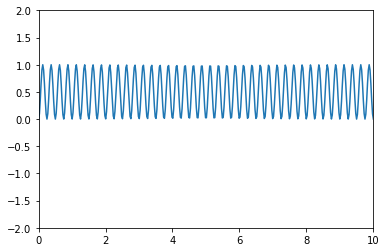

In [16]:
ts = np.linspace(0, 10, 400)
plt.plot(ts, np.sin(4*pi*ts)*np.sin(4*pi*ts))
plt.xlim(0, 10)
plt.ylim(-2, 2)

(-2.0, 2.0)

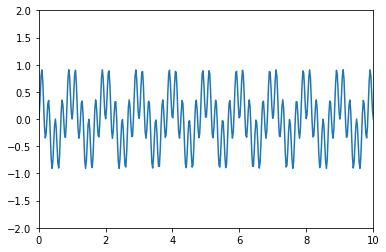

In [17]:
plt.plot(ts, np.sin(4*pi*ts)*np.sin(6*pi*ts))
plt.xlim(0, 10)
plt.ylim(-2, 2)

In [18]:
N = 4
jj = np.arange(0, N).reshape((1, N))
kk = np.arange(0, N).reshape((N, 1))
# broadcasting trick
np.exp(-2*np.pi*1j*jj*kk/N)

array([[ 1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j,
         1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j],
       [ 1.0000000e+00+0.0000000e+00j,  6.1232340e-17-1.0000000e+00j,
        -1.0000000e+00-1.2246468e-16j, -1.8369702e-16+1.0000000e+00j],
       [ 1.0000000e+00+0.0000000e+00j, -1.0000000e+00-1.2246468e-16j,
         1.0000000e+00+2.4492936e-16j, -1.0000000e+00-3.6739404e-16j],
       [ 1.0000000e+00+0.0000000e+00j, -1.8369702e-16+1.0000000e+00j,
        -1.0000000e+00-3.6739404e-16j,  5.5109106e-16-1.0000000e+00j]])

In [19]:
def my_dft(xx):
    N = len(xx)
    ii = np.arange(0, N)
    jj = ii.reshape((1, N))
    kk = ii.reshape((N, 1))
    W = np.exp(-2*np.pi*1j*jj*kk/N)
    return W @ xx

In [20]:
xx = np.random.rand(10)

array([0.67996251, 0.5607403 , 0.42984963, 0.22343281, 0.89586363,
       0.28816815, 0.98738183, 0.49885   , 0.74010531, 0.81044075])

In [21]:
my_dft(xx)

array([ 6.11479492+0.00000000e+00j,  0.11586384+7.57571287e-01j,
        0.44295126+1.70917809e-01j,  0.1878566 -1.97316696e-02j,
       -1.08002206+5.98438204e-02j,  1.35153089+3.73778856e-15j,
       -1.08002206-5.98438204e-02j,  0.1878566 +1.97316696e-02j,
        0.44295126-1.70917809e-01j,  0.11586384-7.57571287e-01j])

In [22]:
np.fft.fft(xx)

array([ 6.11479492+0.j        ,  0.11586384+0.75757129j,
        0.44295126+0.17091781j,  0.1878566 -0.01973167j,
       -1.08002206+0.05984382j,  1.35153089+0.j        ,
       -1.08002206-0.05984382j,  0.1878566 +0.01973167j,
        0.44295126-0.17091781j,  0.11586384-0.75757129j])

`begin define_signal`

In [23]:
import numpy as np
dt = 0.1
tt = np.arange(0, 2, dt)
xx = 1.5 + np.sin(4*np.pi*tt) + 0.5*np.sin(6*np.pi*tt)

array([1.5       , 2.92658477, 1.79389263, 0.61832212, 1.02447174,
       1.5       , 1.97552826, 2.38167788, 1.20610737, 0.07341523,
       1.5       , 2.92658477, 1.79389263, 0.61832212, 1.02447174,
       1.5       , 1.97552826, 2.38167788, 1.20610737, 0.07341523])

`end`

`begin one_coefficient`

In [24]:
N = len(xx)
nn = np.arange(0, N)
# X[0], ist N mal Mittelwert von xx
k = 0
X0 = np.exp(-2j*np.pi*k*nn/N) @ xx

(30+0j)

In [25]:
k = 4
X4 = np.exp(-2j*np.pi*k*nn/N) @ xx  # X[4]

(-1.1796119636642288e-16-9.999999999999991j)

`end`

`begin my_dft`

In [26]:
def my_dft(xx):
    N = len(xx)
    ii = np.arange(0, N)
    kk = ii.reshape((N, 1))  # Zeilenvektor
    nn = ii.reshape((1, N))  # Spaltenvektor
    # kk*nn ergibt eine NxN Matrix dank NumPy Broadcasting
    W = np.exp(-2j*np.pi*kk*nn/N)  # DFT-Matrix
    return W @ xx

XX = my_dft(xx)

array([ 3.00000000e+01+0.00000000e+00j,  2.22044605e-15-3.59434704e-15j,
        1.11716192e-15+1.58900670e-15j,  2.58126853e-15+1.13797860e-15j,
       -1.17961196e-16-1.00000000e+01j, -3.06362517e-15+9.11770659e-15j,
       -1.93838001e-14-5.00000000e+00j, -1.32671651e-14-2.91433544e-16j,
        1.05471187e-14-1.18724475e-14j, -5.96744876e-16-1.23755173e-14j,
       -3.88578059e-16+1.55673109e-14j,  1.05609965e-14+1.25455202e-14j,
       -1.63619118e-14+9.17321774e-15j, -2.64857580e-14-1.39471767e-14j,
       -1.41796297e-14+5.00000000e+00j,  2.37401108e-14-5.55111512e-15j,
       -1.34961486e-15+1.00000000e+01j,  1.65631397e-14+2.89421265e-14j,
        9.79771819e-15-3.83582055e-14j,  1.42802437e-14-3.30672989e-14j])

`end`

`begin my_idft`

In [27]:
def my_idft(xx):
    N = len(xx)
    ii = np.arange(0, N)
    kk = ii.reshape((N, 1))
    nn = ii.reshape((1, N))
    Wi = np.exp(2j*np.pi*kk*nn/N)
    return 1/N * Wi @ xx

my_idft(XX)

array([1.5       +1.09547788e-15j, 2.92658477-3.97941638e-15j,
       1.79389263-7.10378009e-15j, 0.61832212-2.49979681e-15j,
       1.02447174+1.91549272e-15j, 1.5       -1.07656939e-15j,
       1.97552826+5.24406844e-15j, 2.38167788+1.35187159e-15j,
       1.20610737+6.62396274e-18j, 0.07341523-2.90349903e-15j,
       1.5       +2.84026275e-15j, 2.92658477-2.19772486e-15j,
       1.79389263-2.11879938e-15j, 0.61832212-2.85331410e-15j,
       1.02447174+3.99803609e-15j, 1.5       +3.96870037e-15j,
       1.97552826+1.96002911e-15j, 2.38167788+1.54657862e-16j,
       1.20610737+1.28438732e-16j, 0.07341523+5.62195423e-15j])

`end`

`begin np_fft`

In [28]:
np.fft.fft(xx)

array([ 3.00000000e+01+0.00000000e+00j,  8.57383105e-16-3.71322434e-15j,
       -6.10622664e-16+1.33226763e-15j,  2.38283280e-15-1.80689254e-15j,
        0.00000000e+00-1.00000000e+01j, -3.33066907e-15+1.94289029e-15j,
       -1.50426938e-15-5.00000000e+00j, -7.31332948e-16+7.88851691e-16j,
       -8.88178420e-16-4.44089210e-15j,  5.26267822e-15-3.57929825e-16j,
       -1.68878069e-16+0.00000000e+00j,  5.26267822e-15+3.57929825e-16j,
       -8.88178420e-16+4.44089210e-15j, -7.31332948e-16-7.88851691e-16j,
       -1.43593988e-15+5.00000000e+00j, -3.33066907e-15-1.94289029e-15j,
        0.00000000e+00+1.00000000e+01j,  2.38283280e-15+1.80689254e-15j,
       -7.21182111e-16-1.77635684e-15j,  8.57383105e-16+3.71322434e-15j])

In [29]:
np.fft.ifft(XX)

array([1.5       +1.10761606e-15j, 2.92658477-3.82099923e-15j,
       1.79389263-7.14837874e-15j, 0.61832212-2.47349065e-15j,
       1.02447174+1.72863093e-15j, 1.5       -9.51128530e-16j,
       1.97552826+6.47380182e-15j, 2.38167788+1.85691319e-15j,
       1.20610737-3.02916636e-16j, 0.07341523-3.58907332e-15j,
       1.5       +2.84947265e-15j, 2.92658477+4.72615551e-16j,
       1.79389263-6.69459837e-16j, 0.61832212+3.06626417e-15j,
       1.02447174+2.30033586e-15j, 1.5       +3.93877207e-15j,
       1.97552826+2.91960508e-15j, 2.38167788-5.29782482e-15j,
       1.20610737-1.47505173e-15j, 0.07341523-9.85703890e-16j])

`end`

In [30]:
k = 4
np.exp(-2j*np.pi*k*nn/N) @ xx

(-1.1796119636642288e-16-9.999999999999991j)

In [31]:
k = -16
np.exp(-2j*np.pi*k*nn/N) @ xx

(-1.349614864309956e-15-10.000000000000028j)

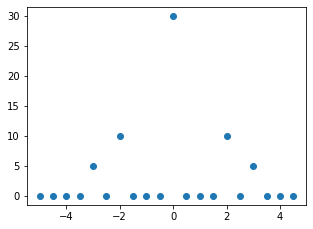

In [32]:
ff = np.fft.fftfreq(N, d=dt)

plt.figure(figsize=(5, 8))
plt.subplot(211)
plt.plot(ff, np.abs(XX), 'o')

`begin fft_timing`

In [33]:
xx_rand = np.random.rand(1000)
%timeit np.fft.fft(xx_rand)

41 µs ± 7.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
%timeit my_dft(xx_rand)

172 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


`end`

`begin prepare_plot`

In [35]:
# Berechne Frequenzstützpunkte der äquivalenten Fourier-Trafo
ff = np.fft.fftfreq(N, d=dt)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5, -5. ,
       -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5])

In [36]:
# Bei Plots mit durchgezogenen Linien muss x-Achse monoton wachsen
# Hilfsfunktion verschiebt Nullfrequenz in die Mitte
ff_shift = np.fft.fftshift(ff)

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [37]:
XX_shift = np.fft.fftshift(XX)

array([-3.88578059e-16+1.55673109e-14j,  1.05609965e-14+1.25455202e-14j,
       -1.63619118e-14+9.17321774e-15j, -2.64857580e-14-1.39471767e-14j,
       -1.41796297e-14+5.00000000e+00j,  2.37401108e-14-5.55111512e-15j,
       -1.34961486e-15+1.00000000e+01j,  1.65631397e-14+2.89421265e-14j,
        9.79771819e-15-3.83582055e-14j,  1.42802437e-14-3.30672989e-14j,
        3.00000000e+01+0.00000000e+00j,  2.22044605e-15-3.59434704e-15j,
        1.11716192e-15+1.58900670e-15j,  2.58126853e-15+1.13797860e-15j,
       -1.17961196e-16-1.00000000e+01j, -3.06362517e-15+9.11770659e-15j,
       -1.93838001e-14-5.00000000e+00j, -1.32671651e-14-2.91433544e-16j,
        1.05471187e-14-1.18724475e-14j, -5.96744876e-16-1.23755173e-14j])

`end`

`begin plot_spectrum`

Text(0.5, 0, 'f [Hz]')

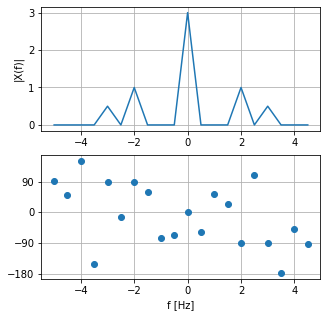

In [38]:
plt.figure(figsize=(5, 5))

plt.subplot(211)
plt.plot(ff_shift, dt*np.abs(XX_shift))
plt.grid()
plt.ylabel("|X(f)|")

plt.subplot(212)
plt.plot(ff_shift, np.angle(XX_shift)/np.pi*180, 'o')
plt.yticks(range(-180, 180, 90))
plt.grid()
plt.xlabel("f [Hz]")
# TODO: Show book

`end`

# Fourier-Analyse

## Erste Analyse

`begin load_audio`

In [39]:
import scipy.io.wavfile
# Lade Audiodatei
# rate=Sampling-Frequenz in Hz, data_int=1D-Array von int's
rate, data_int = scipy.io.wavfile.read('example_piano.wav')
# Für Fourier-Trafo wollen wir float's, Skalierung auf [-1, 1]
data = np.array(data_int, dtype=float) / 2**15
# Zeitvektor
ts = np.arange(len(data))/rate
pass #!

`end`

c:\dev\pfifd\env_jupyter\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Siehe Abbildung §\ref{fig_audio_envelope}§


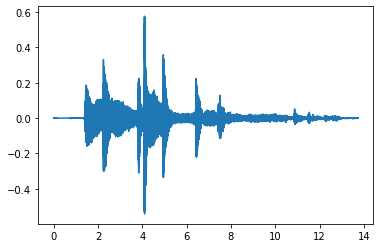

In [41]:
import scipy.signal
audio_envelope = scipy.signal.hilbert(data)
plt.figure()
plt.plot(ts, audio_envelope)
show_book('audio_envelope')

`begin extract_snippet`

In [42]:
# In diesem Zeitbereich sind zwei Töne zu hören
snip_start = int(2.3 * rate)  # 2.3 s
snip_end = int(3.3 * rate)    # 3.3 s
two_notes_audio = data[snip_start:snip_end]
N_samples = len(two_notes_audio)
pass #!

`end`

`begin manual_periodogram`

In [43]:
snip_fft = np.fft.fft(two_notes_audio)
# Multiplikation mit konjugiert-komplexem Spektrum
# liefert Quadrat der Amplitude
# Skalierungsfaktor sorgt dafür, dass Integral über gesamtes
# Frequenzspektrum auch die Gesamtleistung des Signals liefert
snip_power_spec = np.real(snip_fft * np.conj(snip_fft)) / (rate*N_samples)
# Dazu passender Frequenzvektor
ff = np.fft.fftfreq(len(snip_power_spec), 1/rate)
# Wir wollen nur die "rechte Seite" des Spektrums
i_max = int(N_samples/2) + 1
ff, snip_power_spec = ff[:i_max], snip_power_spec[:i_max]

`end`

`begin plot_periodogram`

Siehe Abbildung §\ref{fig_manual_spectrum}§


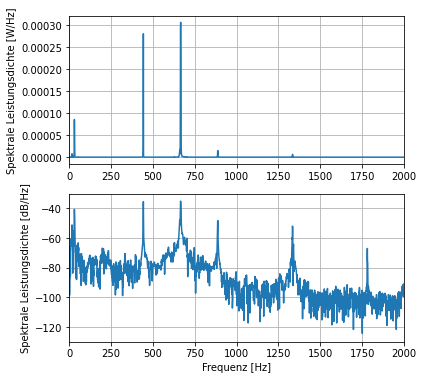

In [44]:
#%matplotlib ipympl #!
plt.figure(figsize=(6, 6))
ax1 = plt.subplot(211)
plt.plot(ff, snip_power_spec)
plt.grid() #!
plt.ylabel('Spektrale Leistungsdichte [W/Hz]')

plt.subplot(212, sharex=ax1)
plt.plot(ff, 10*np.log10(snip_power_spec))
plt.grid() #!
plt.xlim(0, 2000) #!
plt.ylim(-130, -30) #!
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Spektrale Leistungsdichte [dB/Hz]')
show_book('manual_spectrum') #!

`end`

`begin periodogram_scipy`

In [45]:
import scipy.signal
ff, snip_power_spec = scipy.signal.periodogram(two_notes_audio, fs=rate)

`end`

## Fenstern

`begin truncated_sine`

In [46]:
Fs = 20
ts = np.arange(0, 4.25, 1/Fs)
ys = np.sin(2*np.pi*ts)
N = len(ts)
pass #!

`end`

Siehe Abbildung §\ref{fig_window_reason}§


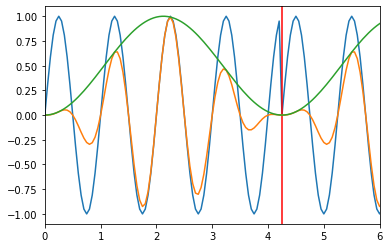

In [47]:
plt.plot(np.hstack([ts, ts+4.25]), np.hstack([ys, ys]))
plt.axvline(4.25, color='red')

window_ys = scipy.signal.get_window('hann', N)
plt.plot(np.hstack([ts, ts+4.25]), np.hstack([ys*window_ys, ys*window_ys]))
plt.plot(np.hstack([ts, ts+4.25]), np.hstack([window_ys, window_ys]))

plt.xlim(0, 6)
show_book('window_reason')

Siehe Abbildung §\ref{fig_window_function_zoo}§


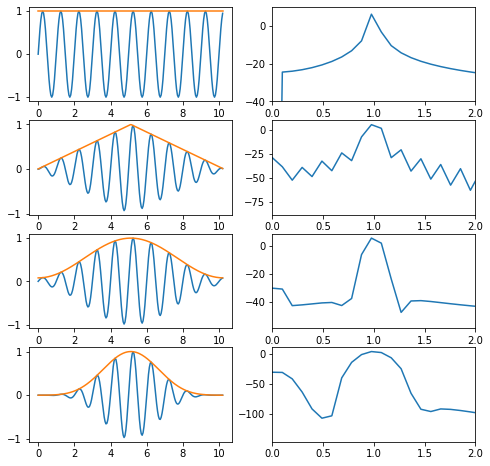

In [48]:
window_names = ['boxcar', 'triang', 'hamming', 'blackmanharris']
rows = len(window_names)

Fs = 20
ts = np.arange(0, 10.25, 1/Fs)
ys = np.sin(2*np.pi*ts)
N = len(ts)

plt.figure(figsize=(8, 8))
for i, window_name in enumerate(window_names):
    plt.subplot(rows, 2, 2*i + 1)
    window_ys = scipy.signal.get_window(window_name, N)
    plt.plot(ts, ys*window_ys)
    plt.plot(ts, window_ys)
    
    plt.subplot(rows, 2, 2*i + 2)
    
    #ff, Pxx = scipy.signal.periodogram(window_ys, fs=Fs)
    #plt.plot(ff, 10*np.log10(Pxx))
    
    ff, Pxx = scipy.signal.periodogram(ys, fs=Fs, window=window_name)
    plt.plot(ff, 10*np.log10(Pxx))
    
    plt.xlim(0, 2)
    if i == 0:
        plt.ylim(-40, 10)

show_book("window_function_zoo")

## Welch

Siehe Abbildung §\ref{fig_overlapping_windows}§


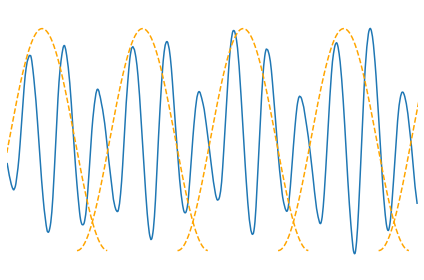

In [49]:
plt.figure()
overlap = 60
window_size = 256
width = 800

plt.plot(two_notes_audio[0:800])

for i in range(-overlap, width, window_size-overlap):
    plt.plot(np.arange(i, i+window_size), 0.5*scipy.signal.get_window('hann', window_size)-0.25, c='orange', ls='--')

plt.xlim(0, width)
plt.ylim(-0.3, 0.3)
plt.axis('off')
plt.tight_layout()

show_book("overlapping_windows")

`begin welch_manual`

Siehe Abbildung §\ref{fig_welch_manual}§


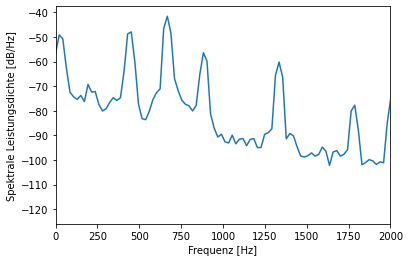

In [50]:
N = len(two_notes_audio)
# Länge jedes Fensters
snippet_length = 2048
# Überlappung
overlap = 128
# Anzahl von Ausschnitten, die ins Gesamtsignal passen
n_snippets = int((N - overlap)/(snippet_length - overlap))
# Fensterfunktion
window_name = 'hann'
# Array für Periodogramm allokieren
# Da uns nur die rechte Seite des Spektrums interessiert haben wir
# im Frequenzbereich nur halb so viele Samples
averaged_periodogram = np.zeros(int(snippet_length/2)+1)

for snippet_start in range(0, N - snippet_length + 1, snippet_length - overlap):
    snippet_data = two_notes_audio[snippet_start:(snippet_start+snippet_length)]
    ff, snippet_periodogram = scipy.signal.periodogram(snippet_data, fs=rate, window=window_name)
    averaged_periodogram += snippet_periodogram / n_snippets

plt.figure()
plt.plot(ff, 10*np.log10(averaged_periodogram))
plt.xlim(0, 2000)
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Spektrale Leistungsdichte [dB/Hz]')
show_book('welch_manual') #!

`end`

`begin welch_scipy`

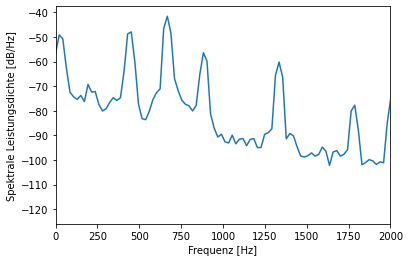

In [51]:
ff, averaged_periodogram = scipy.signal.welch(two_notes_audio, fs=rate, window='hann', nperseg=2048, noverlap=128)
plt.figure() #!
plt.plot(ff, 10*np.log10(averaged_periodogram)) #!
plt.xlim(0, 2000) #!
plt.xlabel('Frequenz [Hz]') #!
plt.ylabel('Spektrale Leistungsdichte [dB/Hz]') #!
pass #!

`end`

Siehe Abbildung §\ref{fig_welch_512}§


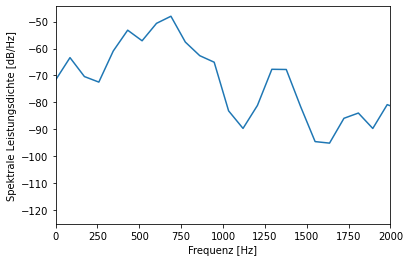

In [52]:
ff, averaged_periodogram = scipy.signal.welch(two_notes_audio, fs=rate, window='hann', nperseg=512, noverlap=32)
plt.figure() #!
plt.plot(ff, 10*np.log10(averaged_periodogram)) #!
plt.xlim(0, 2000) #!
plt.xlabel('Frequenz [Hz]') #!
plt.ylabel('Spektrale Leistungsdichte [dB/Hz]') #!
show_book('welch_512') #!
pass #!

## Spektogramme

In [53]:
octave_freqs = 440*2.0**np.arange(-4, 4)

array([  27.5,   55. ,  110. ,  220. ,  440. ,  880. , 1760. , 3520. ])

`begin spectrogram_scipy`

In [54]:
# Berechne Spektrogramm, Daten werden als Matrix gespeichert
ff, tt, spectrogram = scipy.signal.spectrogram(data, fs=rate, window='hann', nperseg=4096)
# Erste Zeile entspricht der niedrigsten Frequenz, für Visualisierung
# muss Matrix vertikal gedreht werden
spectrogram = np.flipud(spectrogram)
pass #!

`end`

`begin spectrogram_plot`

Siehe Abbildung §\ref{fig_spectrogram}§


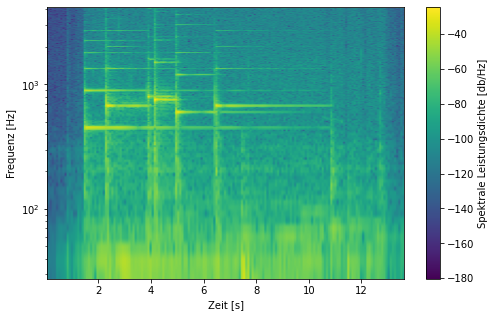

In [55]:
plt.figure(figsize=(8, 5))
# Definiere Bereich, auf den Matrix gezeichnet wird. Dadurch werden auch
# die Achsen gleich richtig beschriftet
# xmin, xmax, ymin, ymax
extent = tt[0], tt[-1], ff[0], ff[-1]
plt.imshow(10*np.log10(spectrogram), extent=extent)
# Skaliere Achsen um Abbildung zu füllen
plt.axis('auto')
# Logarithmische Freqenzskalierung entspricht Tonempfinden
plt.yscale('log')
plt.ylim(27.5, 4186)  # Bandbreite eines Klaviers
plt.xlabel('Zeit [s]')
plt.ylabel('Frequenz [Hz]')
# Erstelle und beschrifte Farbskala
cbar = plt.colorbar()
cbar.ax.set_ylabel('Spektrale Leistungsdichte [db/Hz]')
show_book('spectrogram') #!

`end`

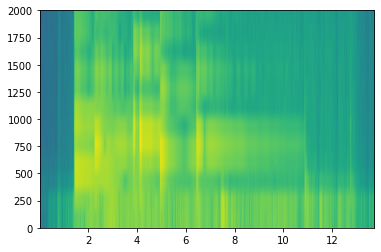

In [56]:
plt.figure()
plt.specgram(data, Fs=rate)
plt.ylim(0, 2000)
plt.show()

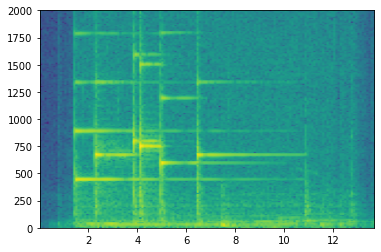

In [57]:
plt.figure()
plt.specgram(data, Fs=rate, NFFT=4096)
plt.ylim(0, 2000)
plt.show()